In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
import scipy

In [2]:
'''
Promblem 2, Part 3. Numerically integrate the integrand x^2/e^x-1
'''

#create function equal to integrand of the integral
def function(x):
    y=(x**2)/(np.expm1(x))
    return y

#use the scipy quad function to integrate the function
integral=scipy.integrate.quad(function,0,np.inf)
print(integral[0])

2.404113806319189


C:\Users\ceg30\AppData\Local\Temp\ipykernel_25500\125837419.py:7: RuntimeWarning: overflow encountered in expm1
  y=(x**2)/(np.expm1(x))


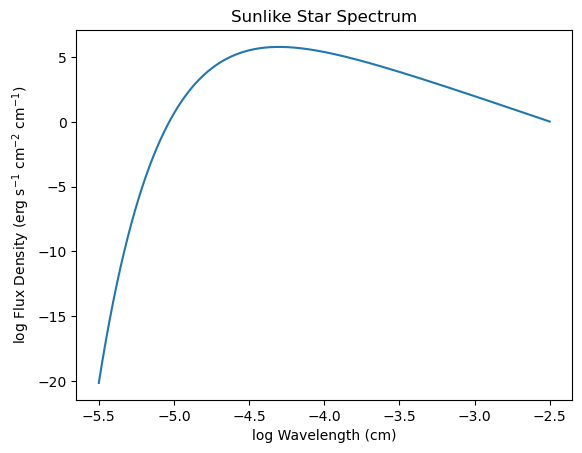

In [103]:
'''
PROBLEM 3

Part A: create a blackbody function:
'''

#planck's constant
h=6.6261E-27*u.erg*u.s

#speed of light
c=3E10*u.cm/u.s

#boltzmann's constant
k=1.3807E-16*u.erg/u.K

def blackbody(wavelength,temp):
    '''takes wavelength and temperature, and calculates the corresponding intensity
    according to Planck's law.

    Inputs:
        wavelength: np array
            array holding wavelengths of a blackbody
            in units of cm

        temp: astropy quantity
            the blackbody temperature of the star in
            units of kelvin

    Outputs:
        flux_d: np array
            array holding the emitted intensity for each
            wavelength in the wavelength array in units of
            erg/s/cm^3/sr
    '''
    #Planck's law for wavelength, calculate the intensity at each wavelength
    flux_d=(2*h*c**2/wavelength**5)*1/(np.expm1(h*c/wavelength/k/temp))
    return flux_d

def flux_density(r_star,distance,intensity,wave,object):
    '''calculate the flux density in units of erg/s/cm^3 for a
    star of a given size and distance. Multiplies intensity
    by star's solid angle as seen by observer at some
    distance away. Also plot the flux as a function of
    wavelength.

    inputs:
        r_star: astropy quantity
            radius of the star in units of cm

        distance: astropy quantity
            distance between the observer and star in units of cm

        intensity: np array
            array of intensities, given in units of erg/s/cm^3/sr

        wave: astropy array
            array holding wavelengths of a blackbody
            in units of cm

        object: string
            name of the object to be plotted

    outputs:
        flux: np array
            flux from star as measured by an observer
            at "distance" away, in units of erg/s/cm^3

    '''

    #calculate solid angle of the star. This is essentially
    #the ratio of the surface area of the star to the surface
    #area of an imaginary star with a radius equal to "distance"
    omega=(r_star/distance)*u.sr

    #multiply intensity by solid angle to get flux
    flux=omega*intensity

    #plot flux as a function of wavelength
    fig,ax=plt.subplots()
    ax.set_xlabel('log Wavelength (cm)')
    ax.set_ylabel('log Flux Density (erg s$^{-1}$ cm$^{-2}$ cm$^{-1}$)')
    ax.set_title(object+' Spectrum')
    plt.plot(np.log10(wave.value),np.log10(flux.value))
    plt.show()
    
    return flux

def graph(x,y,object):
    fig,ax=plt.subplots()
    ax.set_xlabel('log Wavelength (cm)')
    ax.set_ylabel('log Flux Density (erg s$^{-1}$ cm$^{-2}$ cm$^{-1}$)')
    ax.set_title(object+' Spectrum')
    plt.plot(np.log10(x.value),np.log10(y.value))
    plt.show()

'''
plot the blackbody spectrum of the sun at a distance of 10 pc
'''

#define the temerature, radius, and distance to
#sunlike star, as well as create an array with
#the wavelengths we are interested in
t_sun=5800*u.K
d=(10*u.pc).to_value(u.cm)
r_sun=7E10*u.cm
wave=(np.logspace(1.5,4.5,1000)*u.nm).to_value(u.cm)*u.cm

#get the intensity of the sun at each wavelength
sun_I=blackbody(wave,t_sun)/u.sr
sun_flux=flux_density(r_sun,d,sun_I,wave,object='Sunlike Star')

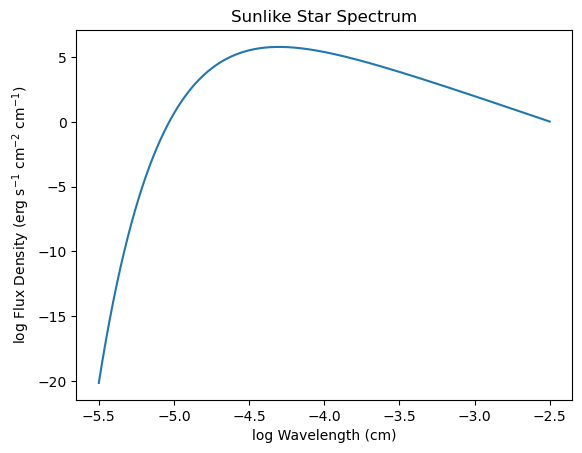

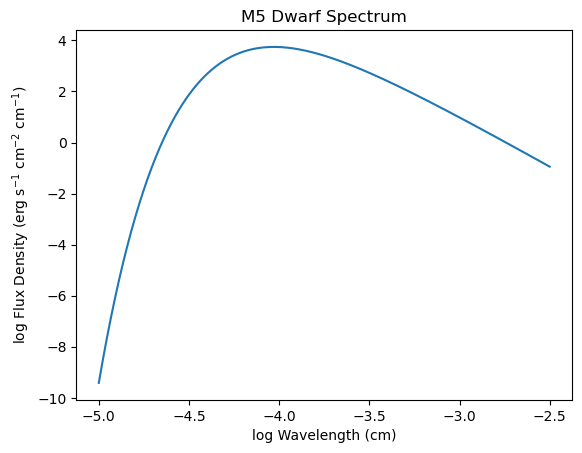

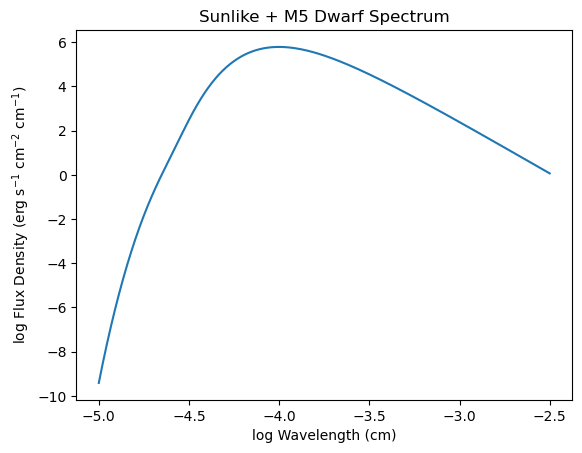

In [104]:
'''
Part B: plot and describe black body spectra for individual and binary stars
'''

'''
sun-like star and m dwarf companion
'''

#plot the spectrum of the sunlike star using the code from above:
sun_flux=flux_density(r_sun,d,sun_I,wave,object='Sunlike Star')

#https://academic.oup.com/mnras/article-pdf/376/2/919/18676437/mnras0376-0919.pdf
#define Mdwarf parameters
r_mdwarf=.209*r_sun
t_mdwarf=3100*u.K

#plot the spectrum of the m dwarf:
wave_mdwarf=(np.logspace(2,4.5,1000)*u.nm).to_value(u.cm)*u.cm
mdwarf_I=blackbody(wave_mdwarf,t_mdwarf)/u.sr
mdwarf_flux=flux_density(r_mdwarf,d,mdwarf_I,wave_mdwarf,object='M5 Dwarf')

#now plot the combined spectrum:
graph(wave_mdwarf,sun_flux+mdwarf_flux,object='Sunlike + M5 Dwarf')


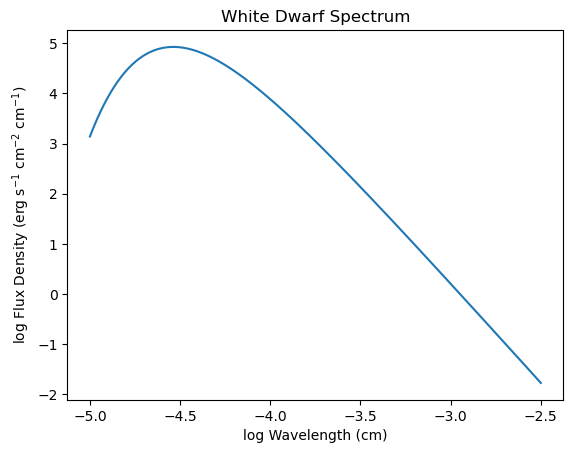

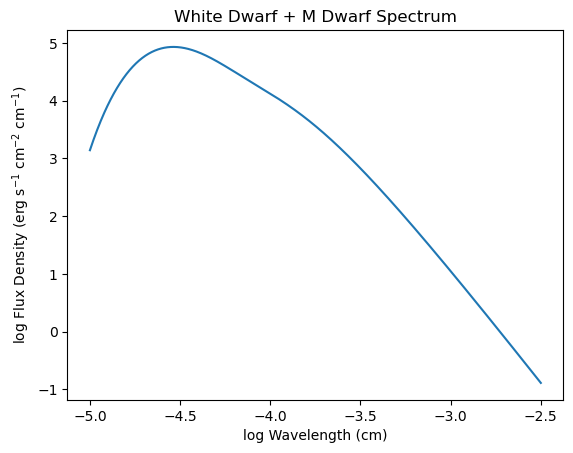

In [105]:
'''
mdwarf and white dwarf companion:
'''

#plot the spectrum of the white dwarf:

#define white dwarf radius and temperature
r_wd=6.4E8*u.cm
t_wd=10000*u.K

#calculate white dwarf intensity and flux
wave_wd=(np.logspace(2,4.5,1000)*u.nm).to_value(u.cm)*u.cm
wd_I=blackbody(wave_wd,t_wd)/u.sr
wd_flux=flux_density(r_wd,d,wd_I,wave_wd,object='White Dwarf')

#now plot the combined spectrum of the mdwarf and white dwarf:
graph(wave_wd,wd_flux+mdwarf_flux,object='White Dwarf + M Dwarf')

C:\Users\ceg30\AppData\Local\Temp\ipykernel_25500\177697192.py:80: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(wave.value),np.log10(flux.value))


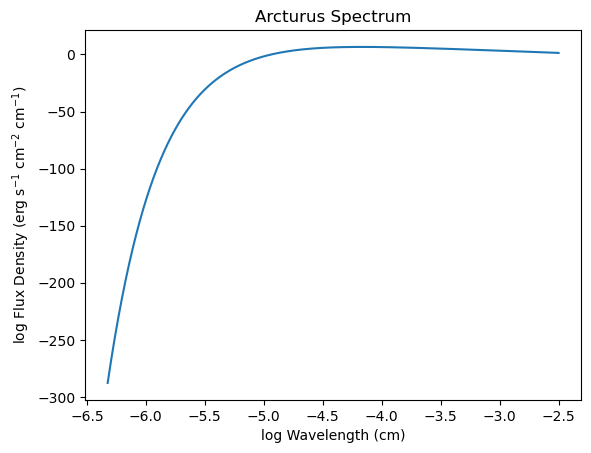

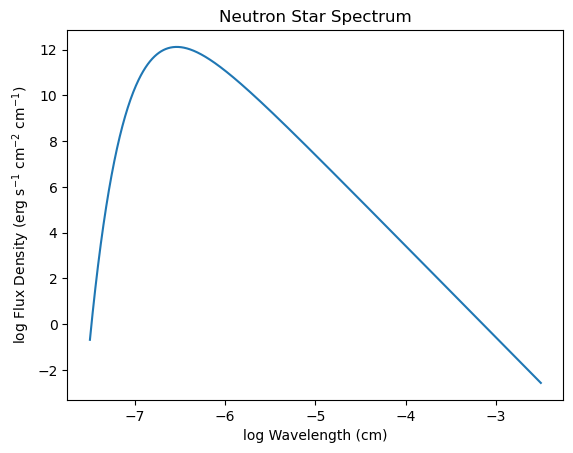

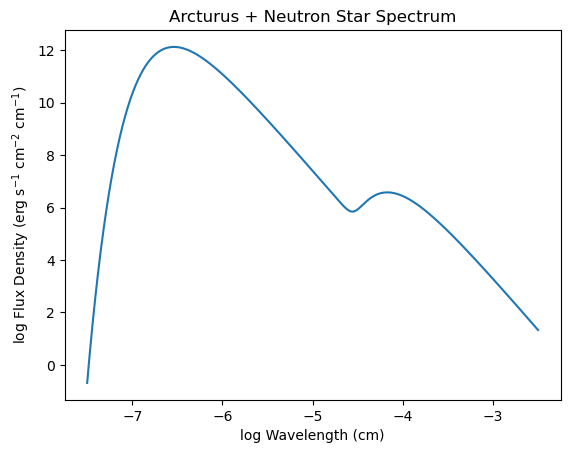

In [119]:
'''
arcturus and neutron star companion
'''

#plot arcturus spectrum

#define arcturus radius and temperature
r_ar=28*r_sun
t_ar=4290*u.K

#calculate arcturus flux density and plot
wave_ar=(np.logspace(-.5,4.5,1000)*u.nm).to_value(u.cm)*u.cm
ar_I=blackbody(wave_ar,t_ar)/u.sr
ar_flux=flux_density(r_ar,d,ar_I,wave_ar,object='Arcturus')

#plot neutron star spectrum

#define neutron star radius and temperature
r_ns=1E6*u.cm
t_ns=1E6*u.K

#calculate neutron star flux density and plot
wave_ns=(np.logspace(-.5,4.5,1000)*u.nm).to_value(u.cm)*u.cm
ns_I=blackbody(wave_ns,t_ns)/u.sr
ns_flux=flux_density(r_ns,d,ns_I,wave_ns,object='Neutron Star')

#plot combinesd spectrum:
graph(wave_ar,ar_flux+ns_flux,object='Arcturus + Neutron Star')

In [109]:
'''
Question 3 d

Integrate the specific flux over frequency to get the total emitted flux of a section of cloud
'''

def intensity(nu,T):
    '''find the initial intensity the star emits at as a
    function of frequency using the planck equation

    Inputs:
        nu: astropy quantity
            frequency at which to evaluate the intensity

        T: astropy quantity
            temperature of the star

    Returns:
        I_nu: astropy quantity
            intensity the star emits at a specific
            frequency, nu
    
    '''
    #planck's constant
    h=6.6261E-27

    #speed of light
    c=3E10
    
    #boltzmann's constant
    k=1.3807E-16

    #calculate intensity at the given wavelength
    I_nu=(2*h*(nu**3)/c**2)*(1/np.expm1((h*nu)/(k*T)))

    return I_nu

def flux_d(nu):
    '''find the flux density that is absorbed by the
    cloud at a given frequency by multiplying by solid angle

    Inputs:
        nu: astropy quantity
            frequency at which to evaluate flux density

    Returns:
        integrand: astropy quantity
            flux density absorvbed by the cloud
            at the frequency nu
            
    '''

    #define radius and temperature of star, as well
    #as the radius of the cloud
    r_star=7E10
    t_star=5800
    r_cloud=1.5E15

    #find tau at the frequency nu
    tau=nu/(3E14)

    #find the intrinsic flux density of the star using the
    #intensity function
    F_star=intensity(nu,t_star)

    #calculate the absorbed flux density at this wavelength
    #using the star's intrinsic flux density and solid angle
    integrand=F_star*((r_star/r_cloud)**2)*(1-np.exp(-tau))
    return integrand

#integrate the integrand to find the total flux
#absorbed by the cloud. Split into two integrals
#because the internal integrator did not sample
#the domain properly otherwise
flux1=scipy.integrate.quad(flux_d,0,1E6)
flux2=scipy.integrate.quad(flux_d,1E6,1E18)

print('Flux ='+str(flux1[0]+flux2[0]),'erg/s/cm^2')

Flux =32.067957563712895 erg/s/cm^2


C:\Users\ceg30\AppData\Local\Temp\ipykernel_25500\568295902.py:34: RuntimeWarning: overflow encountered in expm1
  I_nu=(2*h*(nu**3)/c**2)*(1/np.expm1((h*nu)/(k*T)))


1.7795675594663716e-17 erg / cm2


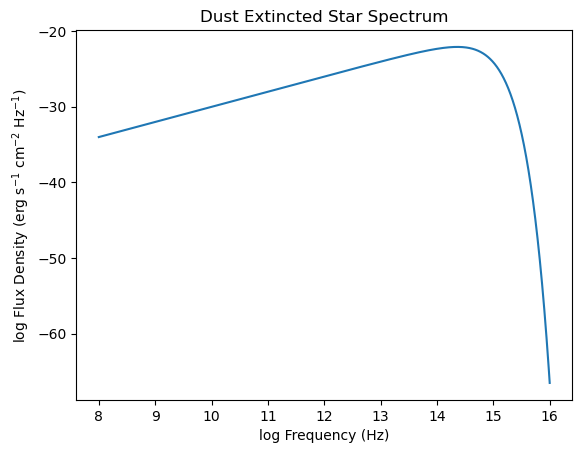

C:\Users\ceg30\AppData\Local\Temp\ipykernel_25500\4011685210.py:94: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(nu.value),np.log10(flux_d.value))


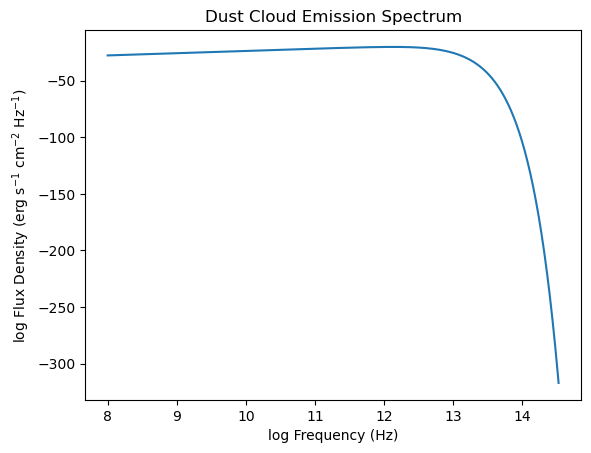

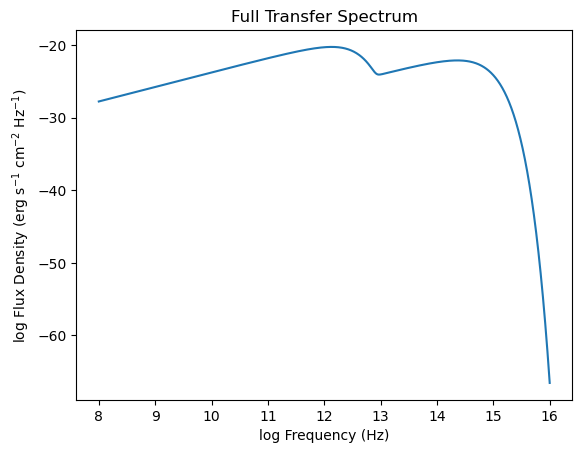

9.158186213247066e-35 erg / cm2


In [116]:
'''
question 3e: plot the combined spectrum of a star and an obscuring cloud from 10 pc away
'''

def I_extinct(nu,T):
    '''find the intensity that passes through the cloud
    and can be seen by the observer.

    Inputs:
        nu: np array
            array holding all of the values of
            frequency to be evaluated

        T: astropy quantity
            the temperature of the star

    Returns:
        I_nu: np array
            array holding the intensity that
            passes through the cloud at each frequency

    '''
    #planck's constant
    h=6.6261E-27*u.erg*u.s
    
    #speed of light
    c=3E10*u.cm/u.s
    
    #boltzmann's constant
    k=1.3807E-16*u.erg/u.K

    #calculate tau, then find the intensity that passes
    #through the cloud using I=I(0)e^-tau, where I(0) is
    #the blackbody spectrum of the star
    tau=nu/(3E14/u.s)
    I_nu=(2*h*(nu**3)/c**2)*(1/np.expm1((h*nu)/(k*T)))*(np.exp(-tau))
    
    return I_nu

def flux(I,R,d):
    '''find the flux density of an object
    by integrating its intensity over solid angle

    Inputs:
        I: np array
            array holding the intensity at
            each frequency

        R: astropy quantity
            radius of the emitting object

        d: astropy quantity
            distance to the emitting object

    Outputs:
        flux_d: np array
            array holding the flux density
            at each given wavelength


    '''

    #find the solid angle of the emitting
    #object, and integrate intensity over it
    #to get fluc
    omega=(R/d)**2
    flux_d=I*omega
    
    return flux_d

def plot(nu,flux_d,object):
    '''plot the flux density of an object

    Inputs:
        nu: np array
            array holding the frequencies to be plottes

        flux_d: np array
            array holding the flux density of the object at
            each frequency

        object: string
            name of the object being plotted

    '''

    #set up the figure
    fig,ax=plt.subplots()
    ax.set_xlabel('log Frequency (Hz)')
    ax.set_ylabel('log Flux Density (erg s$^{-1}$ cm$^{-2}$ Hz$^{-1}$)')
    ax.set_title(object+' Spectrum')

    #plot the date in logspace
    plt.plot(np.log10(nu.value),np.log10(flux_d.value))
    plt.show()

#define the frequency range to be plotted and
#distance to the object
nu=np.logspace(8,16,1000)/u.s
d=(10*u.pc).to_value(u.cm)*u.cm

#first, the spectrum of the obscured star from 10 pc away

#define radius and temperature of star
r_star=7E10*u.cm
t_star=5800*u.K

#calculate flux density of the star and plot it
I_star=I_extinct(nu,t_star)
print(I_star[0])
flux_star=flux(I_star,r_star,d)
plot(nu,flux_star,object='Dust Extincted Star')

#now, show the emission spectrum of the cloud from 10 pc away

#define the radius and temperature of the cloud
r_cloud=1.5E15*u.cm
t_cloud=23*u.K

#calculate the flux density of the cloud and plot it
I_cloud=I_extinct(nu,t_cloud)
flux_cloud=flux(I_cloud,r_cloud,d)
plot(nu,flux_cloud,object='Dust Cloud Emission')

#now, plot the combined spectrum
plot(nu,flux_star+flux_cloud,object='Full Transfer')
    